### Importing libs

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import linear_model
import networkx as nx

# Question 1: Propensity score matching

## Loading the data

In [2]:
lalonde_data = pd.read_csv("lalonde.csv")
lalonde_data.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


In [3]:
lalonde_data.dtypes

id           object
treat         int64
age           int64
educ          int64
black         int64
hispan        int64
married       int64
nodegree      int64
re74        float64
re75        float64
re78        float64
dtype: object

In [27]:
lalonde_data.describe()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white,propensity
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.301303,27.363192,10.268730,0.395765,0.117264,0.415309,0.630293,4557.546569,2184.938207,6792.834483,0.486971,0.310002
std,0.459198,9.881187,2.628325,0.489413,0.321997,0.493177,0.483119,6477.964479,3295.679043,7470.730792,0.500238,0.267916
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010233
25%,0.000000,20.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,238.283425,0.000000,0.079167
50%,0.000000,25.000000,11.000000,0.000000,0.000000,0.000000,1.000000,1042.330000,601.548400,4759.018500,0.000000,0.180189
75%,1.000000,32.000000,12.000000,1.000000,0.000000,1.000000,1.000000,7888.498250,3248.987500,10893.592500,1.000000,0.631488
max,1.000000,55.000000,18.000000,1.000000,1.000000,1.000000,1.000000,35040.070000,25142.240000,60307.930000,1.000000,0.885622


## 1. A naive analysis

We use the following methods for the naive comparison of the distribution of the revenue of the two groups:

A. plots:
1. boxplots
2. histogram
3. QQ plot

B.numbers:
1. descriptive statistics + standardizede difference (see paper)
2. Kolmogorov Smirnov test (or some other) -- todo anderer test für revenue? (paired t test??) p values??

todo: functions for analysis
flow: analysis -> match -> analysis -> refine -> analysis
todo: show in one plot, make plot pretty, interpret

In [55]:
treat = {0: 'treated', 1: 'control'}

def draw_box(df, col):
    #draw boxplot
    df.boxplot(by='treat', column=col, figsize = [10, 7])

def draw_hist(df, col):
    #draw histogram
    fig_hist, axs_hist = plt.subplots(nrows=2)
    df.groupby("treat")[col].plot(kind='kde', ax=axs_hist[1])
    axs_hist[1].set_xlabel(col)
    groups = df.groupby("treat")[col]#.hist(alpha=0.6, ax=ax, range=[lalonde_data[name].min(), lalonde_data[name].max()])
    for k, v in groups:
        v.hist(label=treat[k], alpha=.75, ax=axs_hist[0], bins=15, range=[df[col].min(), df[col].max()], figsize = [10, 7])
    axs_hist[0].legend()
    axs_hist[0].set_ylabel('number of participants')
    

def draw_qqs(df, col):
    fig_qq, axs_qq = plt.subplots(nrows=2, figsize=(10, 20))
    stats.probplot(df[df.treat == 0][col], dist="norm", plot=axs_qq[0])
    axs_qq[0].set_title('Control Group')
    stats.probplot(df[df.treat == 1][col], dist="norm", plot=axs_qq[1])
    axs_qq[1].set_title('Treated Group')
    plt.show()
    
def get_summary(df, col):
    print('Control group')
    print('================================================')
    print(df[df.treat == 0][col].describe())
    print('Treated group')
    print('================================================')
    print(df[df.treat == 1][col].describe())

def test(df, col):
    #TODO use different test - data not normally distributed, willcoxon gives error
    print(stats.ttest_ind(df[df.treat == 0][col], df[df.treat == 1][col]))

In [56]:
def analyse_numeric(df, col):    
        print('=================================================================================')
        print('                                  ', col)
        print('=================================================================================')
        draw_box(df, col)
        draw_hist(df, col)
        draw_qqs(df, col)
        print()
        get_summary(df, col)
        print()
        test(df, col)
        print()
        print()

                                   re78


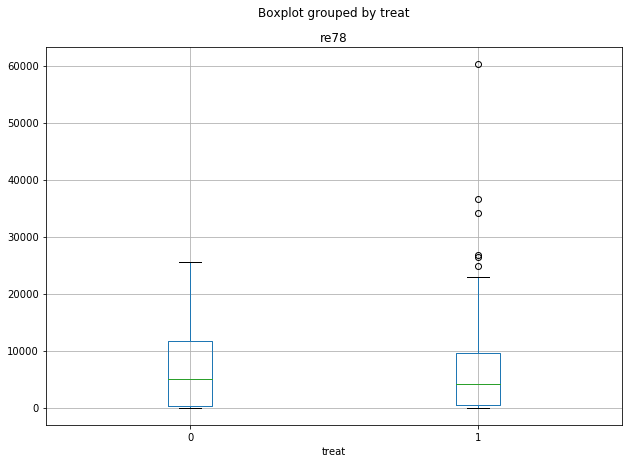

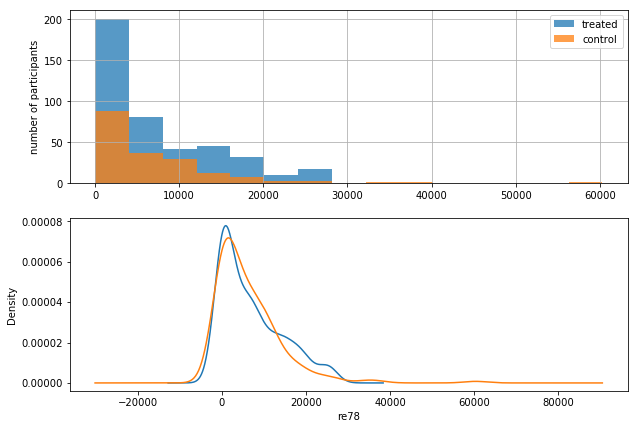

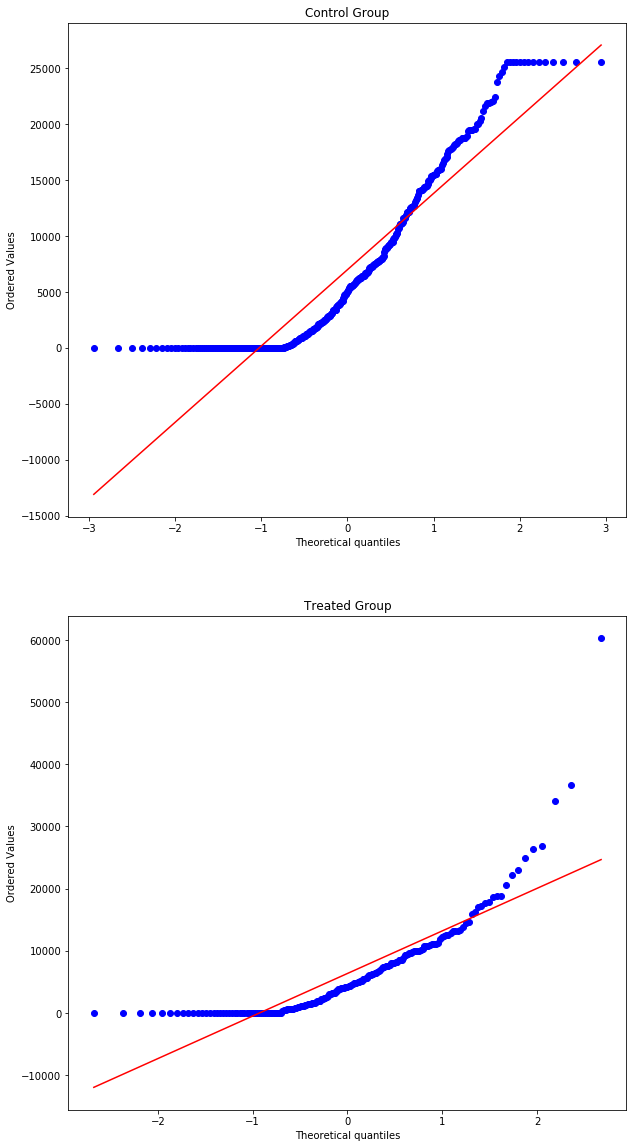


Control group
count      429.000000
mean      6984.169742
std       7294.161791
min          0.000000
25%        220.181300
50%       4975.505000
75%      11688.820000
max      25564.670000
Name: re78, dtype: float64
Treated group
count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64

Ttest_indResult(statistic=0.96635222544637778, pvalue=0.33424966859096539)




In [57]:
analyse_numeric(lalonde_data, 're78')

### **(Naive) Conclusions:** .... TODO...

## 2. A closer look at the data

### Analysis of numerical columns

                                   age


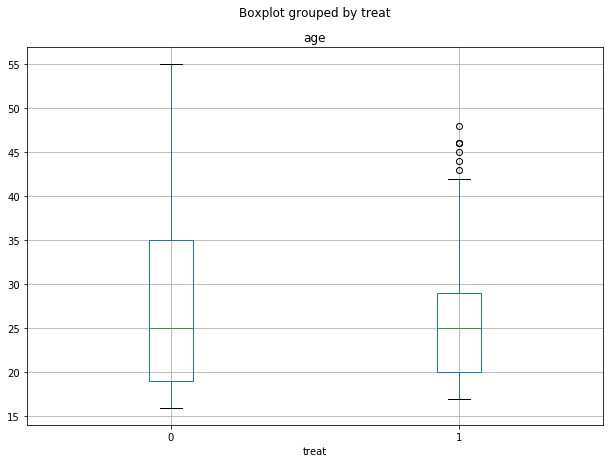

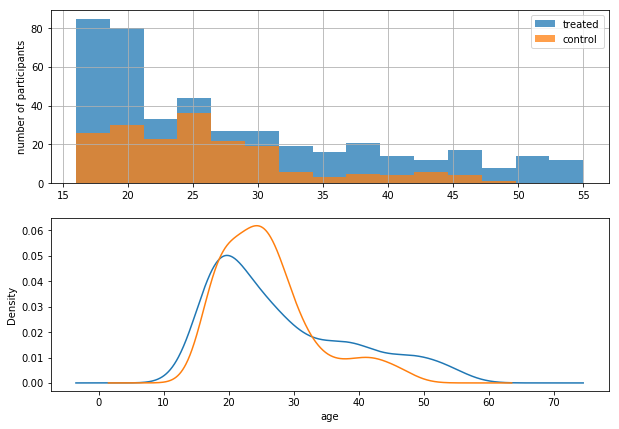

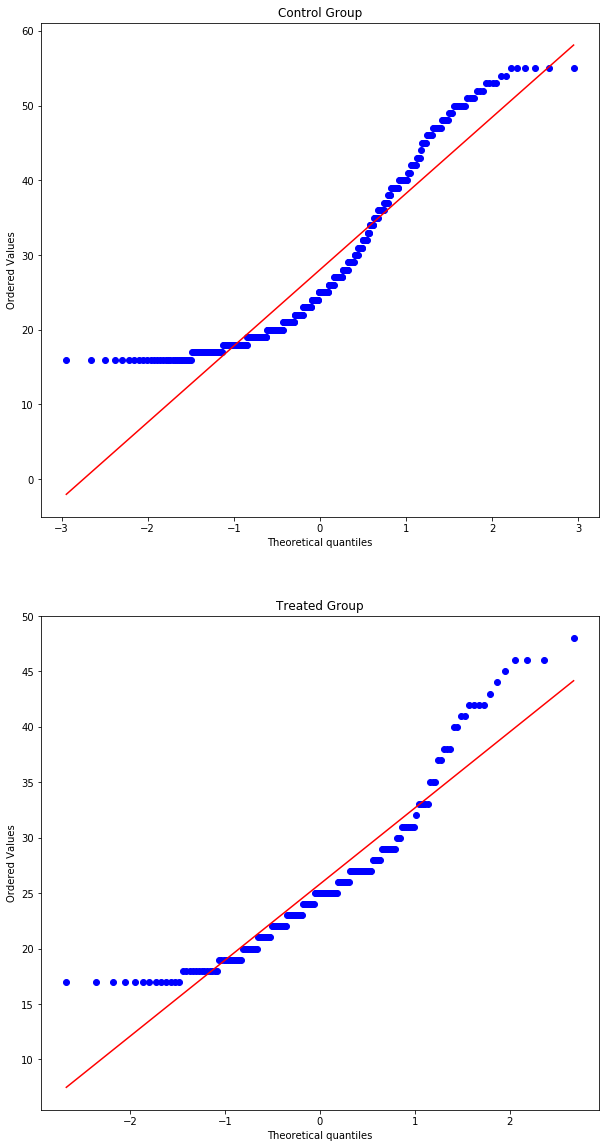


Control group
count    429.000000
mean      28.030303
std       10.786653
min       16.000000
25%       19.000000
50%       25.000000
75%       35.000000
max       55.000000
Name: age, dtype: float64
Treated group
count    185.000000
mean      25.816216
std        7.155019
min       17.000000
25%       20.000000
50%       25.000000
75%       29.000000
max       48.000000
Name: age, dtype: float64

Ttest_indResult(statistic=2.5590130633091519, pvalue=0.010736332582438238)


                                   educ


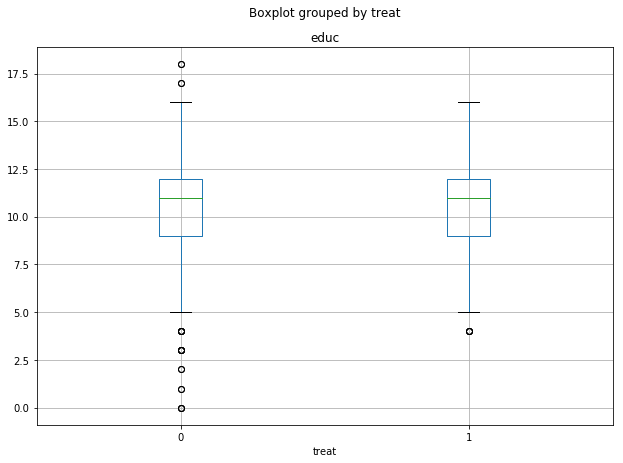

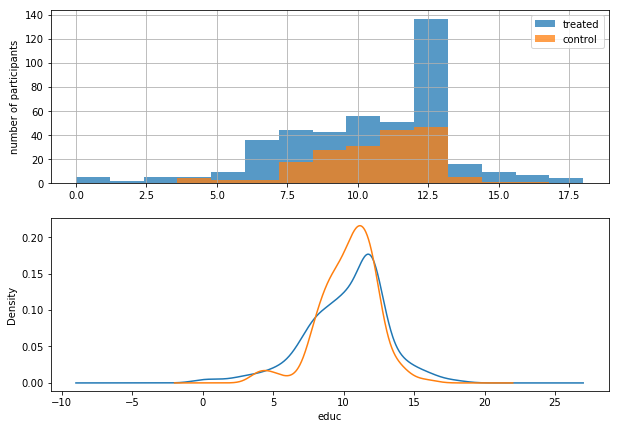

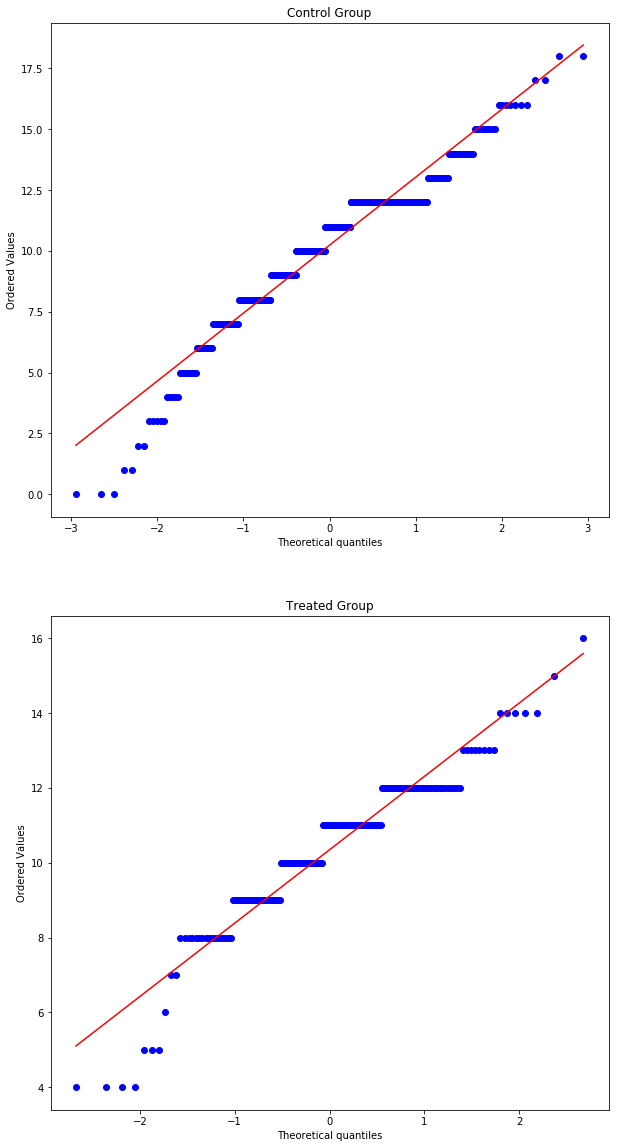


Control group
count    429.000000
mean      10.235431
std        2.855238
min        0.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       18.000000
Name: educ, dtype: float64
Treated group
count    185.000000
mean      10.345946
std        2.010650
min        4.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       16.000000
Name: educ, dtype: float64

Ttest_indResult(statistic=-0.47774686042840225, pvalue=0.63300097204734651)


                                   re74


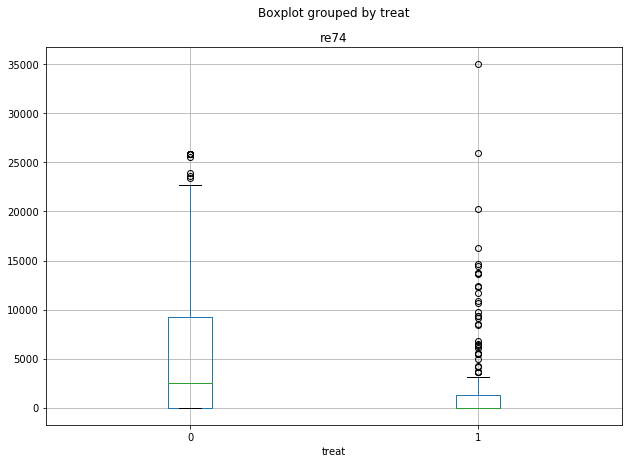

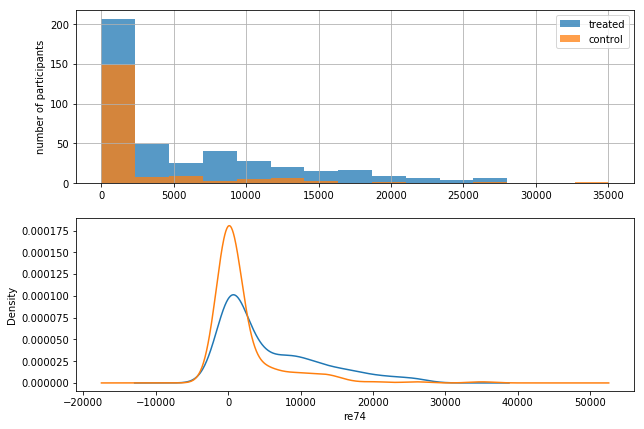

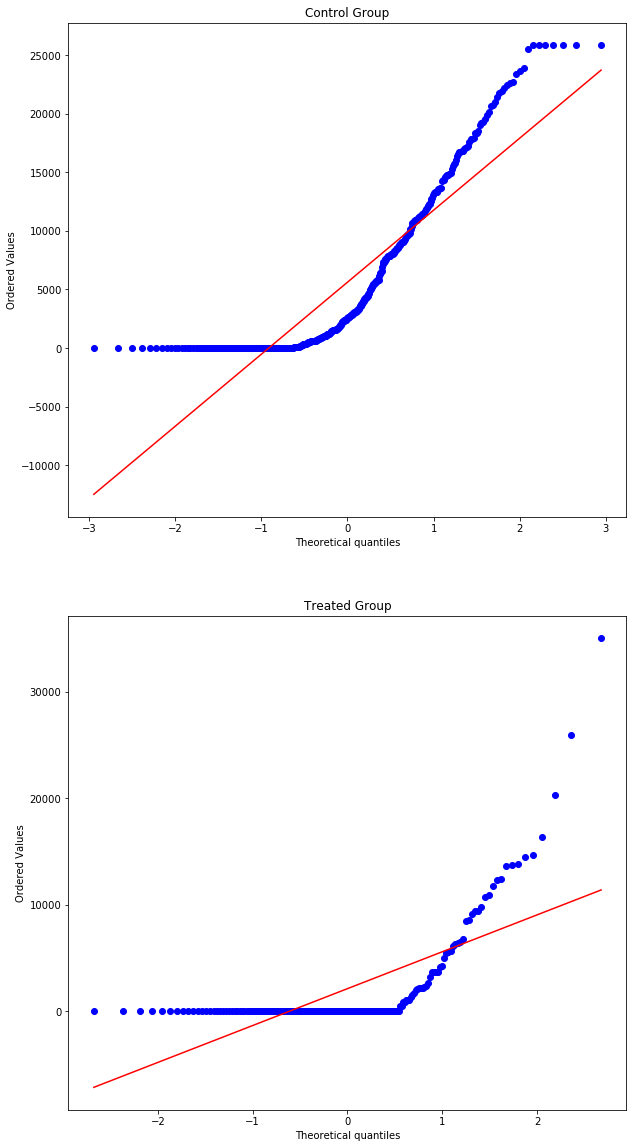


Control group
count      429.000000
mean      5619.236506
std       6788.750796
min          0.000000
25%          0.000000
50%       2547.047000
75%       9277.128000
max      25862.320000
Name: re74, dtype: float64
Treated group
count      185.000000
mean      2095.573689
std       4886.620353
min          0.000000
25%          0.000000
50%          0.000000
75%       1291.468000
max      35040.070000
Name: re74, dtype: float64

Ttest_indResult(statistic=6.3814644855087463, pvalue=3.4645852577576162e-10)


                                   re75


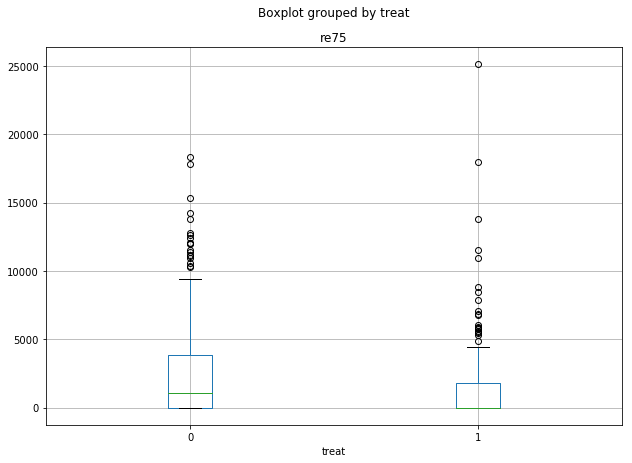

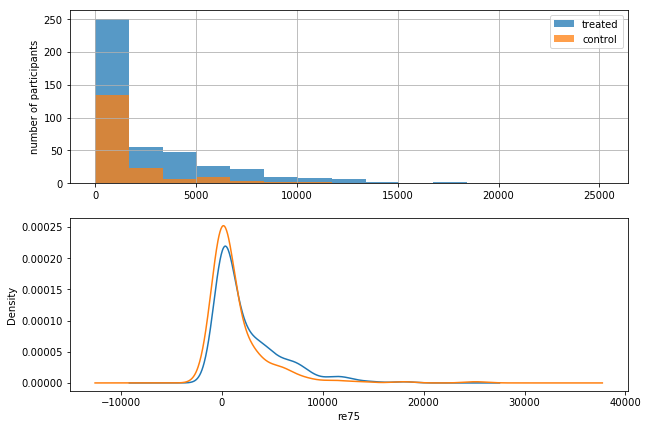

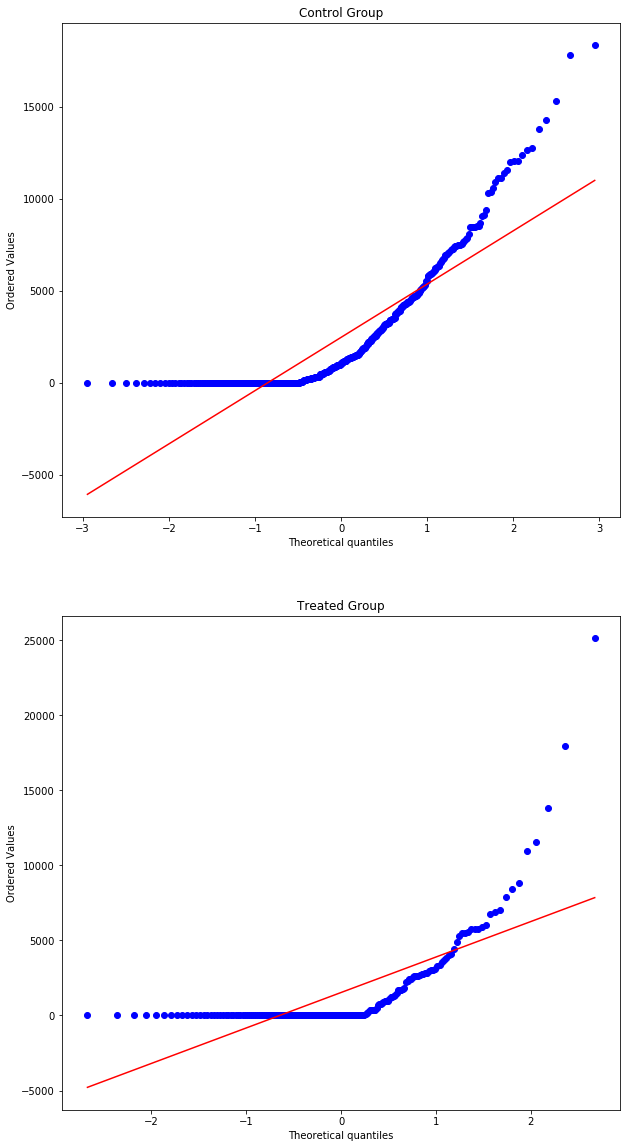


Control group
count      429.000000
mean      2466.484443
std       3291.996183
min          0.000000
25%          0.000000
50%       1086.726000
75%       3881.419000
max      18347.230000
Name: re75, dtype: float64
Treated group
count      185.000000
mean      1532.055314
std       3219.250870
min          0.000000
25%          0.000000
50%          0.000000
75%       1817.284000
max      25142.240000
Name: re75, dtype: float64

Ttest_indResult(statistic=3.2485513845081773, pvalue=0.0012234443948498416)




In [58]:
for col in ['age', 'educ', 're74', 're75']:
    analyse_numeric(lalonde_data, col)

### Analysis of categorical columns

In [59]:
def draw_bar(df, col):
    df_grouped = df.groupby(['treat', col])[col].count()
    df_grouped = df_grouped.unstack()
    pl = df_grouped.plot(kind='bar', figsize=[5,5])
    pl.set_title(col)
    pl.set_ylabel('number of participants')
    pl.set_xlabel('group')

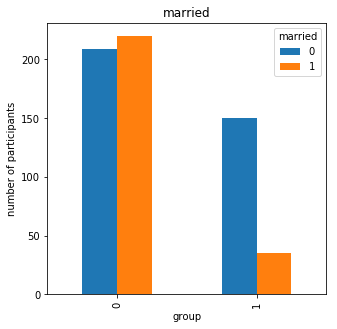

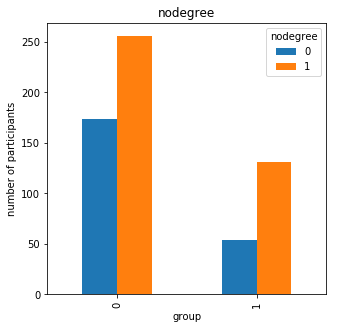

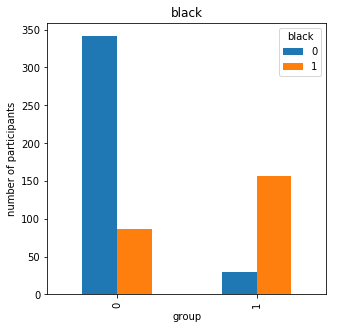

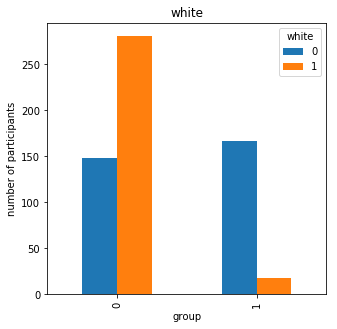

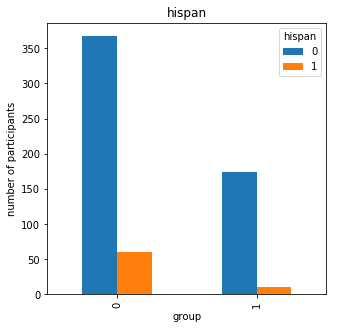

In [60]:
lalonde_data['white'] = (~(lalonde_data['black'].astype(bool) | lalonde_data['hispan'].astype(bool))).astype(int)
for col in ['married', 'nodegree', 'black', 'white', 'hispan']: # todo only one histogram for race
    draw_bar(lalonde_data, col)

In [61]:
#TODO test

**Conclusions**:

## 3. A propensity score model

In [62]:
#todo read article

In [63]:
logistic = linear_model.LogisticRegression()

logistic = logistic.fit(lalonde_data.drop(lalonde_data.columns[[0, 1, -1]], axis=1), lalonde_data.treat)
propensity_scores = logistic.predict_proba(lalonde_data.drop(lalonde_data.columns[[0, 1, -1]], axis=1))

print(logistic.classes_)
print(propensity_scores[:5])

In [64]:
lalonde_data['propensity'] = propensity_scores[:, 1]

## 4. Balancing the dataset via matching

1:1, without replacement
optimal matching

In [65]:
graph_data = pd.merge(lalonde_data.reset_index()[lalonde_data.treat == 1].assign(key=0), lalonde_data.reset_index()[lalonde_data.treat == 0].assign(key=0), on='key').drop('key', axis=1)
#print(graph_data.head())
graph_data['weight'] = 1 - np.abs(graph_data['propensity_x'] - graph_data['propensity_y'])
G = nx.Graph()
G.add_weighted_edges_from(zip(graph_data.index_x, graph_data.index_y, graph_data.weight))
matching = nx.max_weight_matching(G)

In [66]:
len(matching) == 2 * len(lalonde_data[lalonde_data.treat == 1])

True

In [67]:
#todo remove :-)
for key, value in matching.items():
    if(matching[value]!=key):
        print('sad storry')
print('juhu')

juhu


In [68]:
lalonde_data_balanced = lalonde_data.iloc[list(matching.keys())]
lalonde_data_balanced.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white,propensity
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0,0.542187
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0,0.219299
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0,0.806989
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0,0.708834
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0,0.676078


compare outcomes: see 1 and 2 + techniques from paper

treat
0    Axes(0.125,0.536818;0.775x0.343182)
1    Axes(0.125,0.536818;0.775x0.343182)
Name: re78, dtype: object

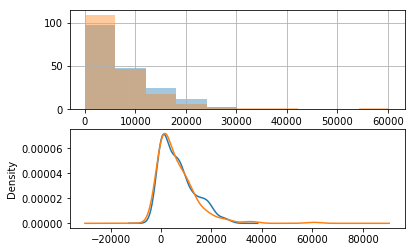

In [69]:
fig, axs = plt.subplots(nrows=2)
lalonde_data_balanced.groupby("treat").re78.plot(kind='kde', ax=axs[1])
lalonde_data_balanced.groupby("treat").re78.hist(alpha=0.4, ax=axs[0], range=[lalonde_data_balanced.re78.min(), lalonde_data_balanced.re78.max()])

## Perform same analysis as in 1 and 2 

                                   age


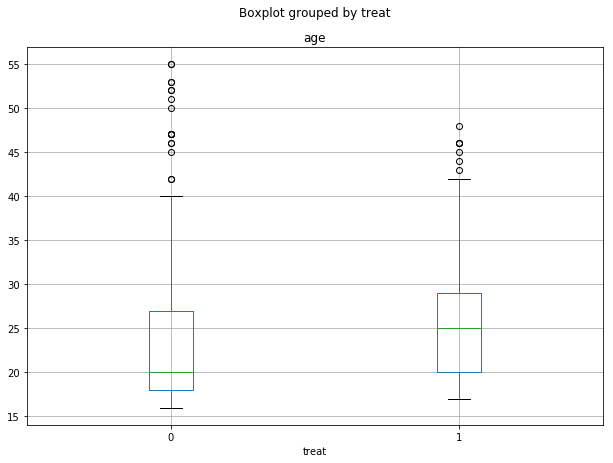

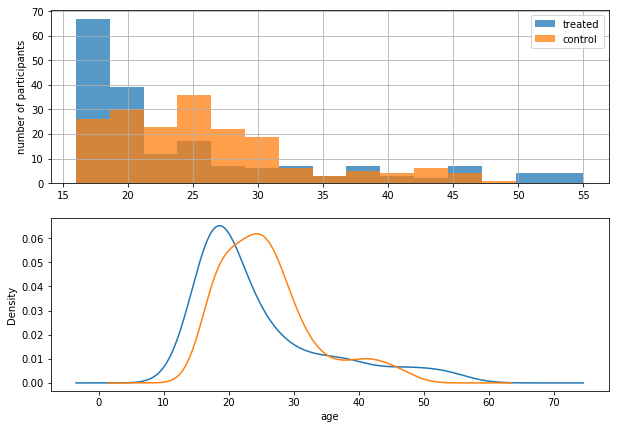

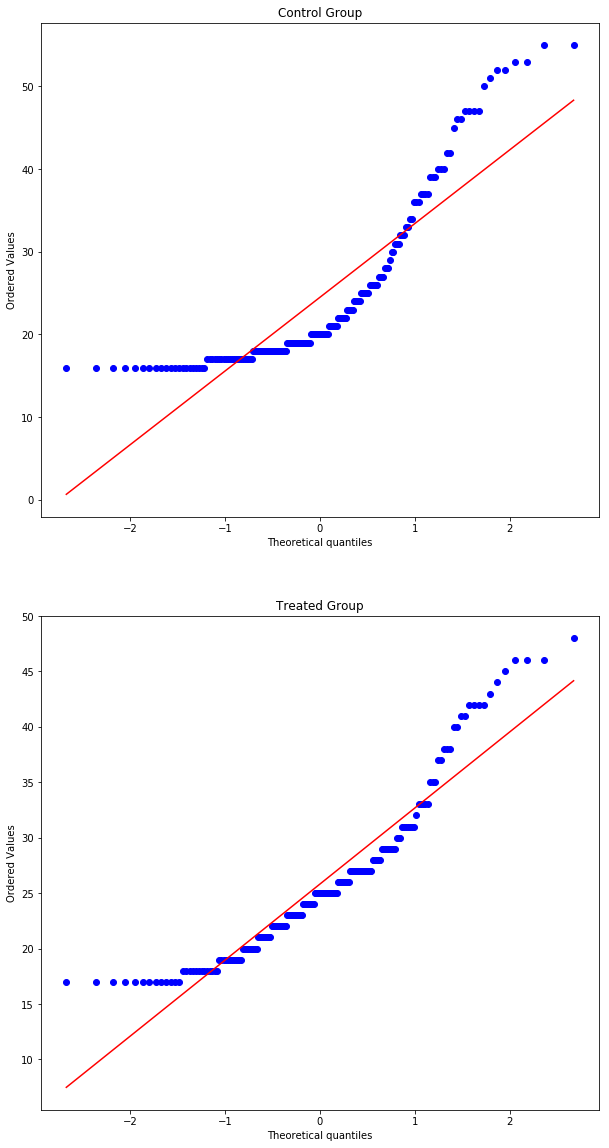


Control group
count    185.000000
mean      24.497297
std        9.955403
min       16.000000
25%       18.000000
50%       20.000000
75%       27.000000
max       55.000000
Name: age, dtype: float64
Treated group
count    185.000000
mean      25.816216
std        7.155019
min       17.000000
25%       20.000000
50%       25.000000
75%       29.000000
max       48.000000
Name: age, dtype: float64

Ttest_indResult(statistic=-1.4632488463282203, pvalue=0.1442528749579203)


                                   educ


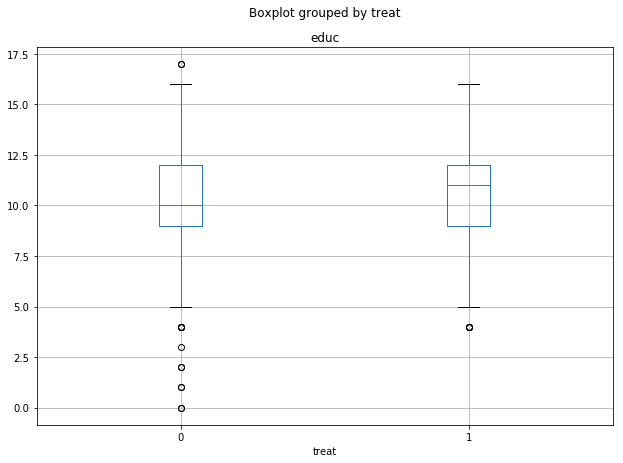

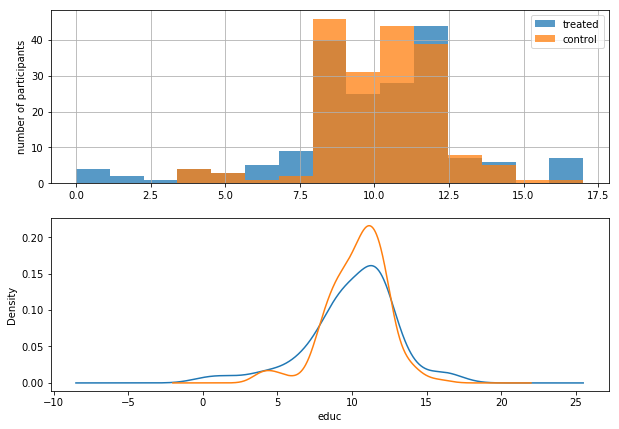

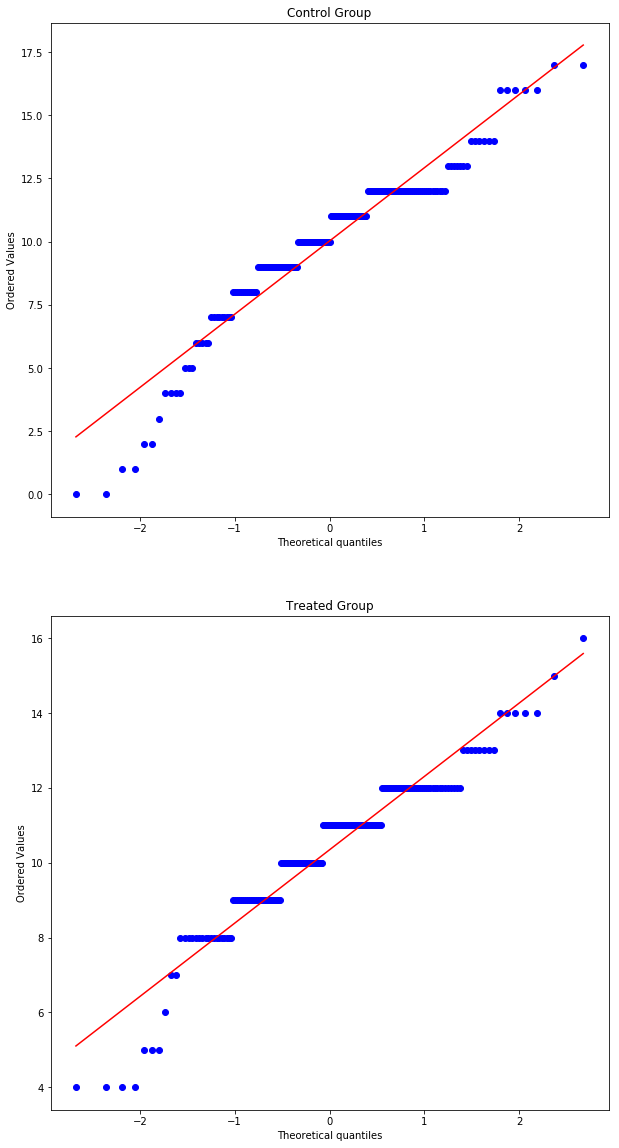


Control group
count    185.000000
mean      10.027027
std        2.984439
min        0.000000
25%        9.000000
50%       10.000000
75%       12.000000
max       17.000000
Name: educ, dtype: float64
Treated group
count    185.000000
mean      10.345946
std        2.010650
min        4.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       16.000000
Name: educ, dtype: float64

Ttest_indResult(statistic=-1.2054193529108073, pvalue=0.22881597625121858)


                                   re74


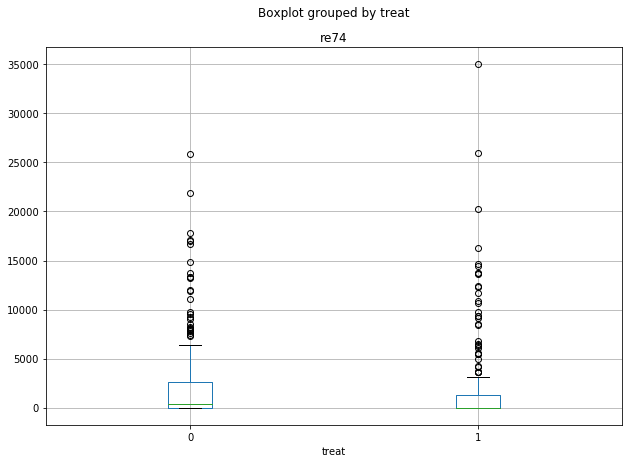

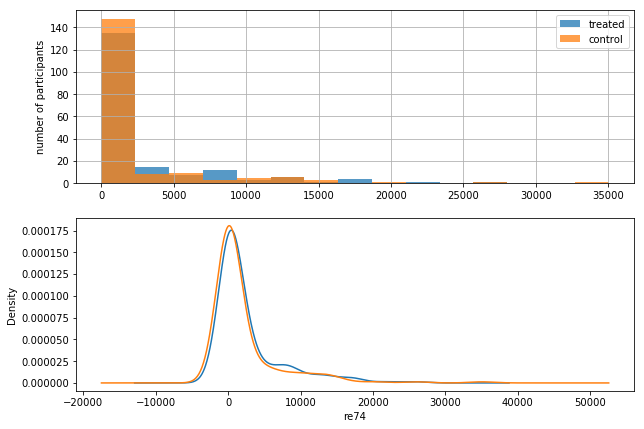

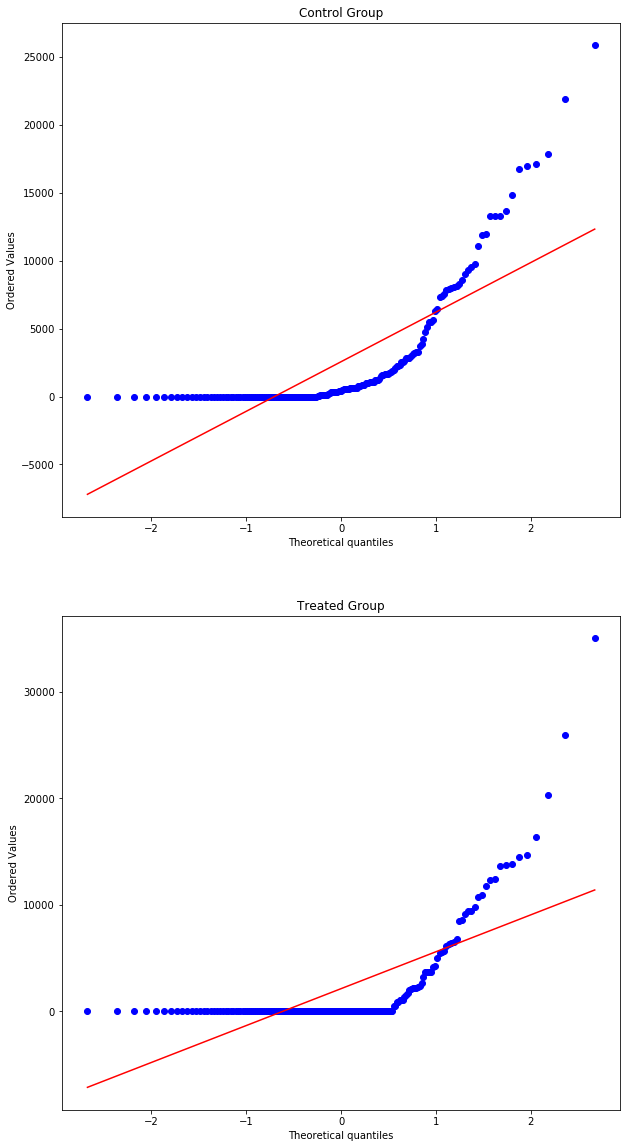


Control group
count      185.000000
mean      2560.232175
std       4586.324101
min          0.000000
25%          0.000000
50%        411.446000
75%       2648.929000
max      25862.320000
Name: re74, dtype: float64
Treated group
count      185.000000
mean      2095.573689
std       4886.620353
min          0.000000
25%          0.000000
50%          0.000000
75%       1291.468000
max      35040.070000
Name: re74, dtype: float64

Ttest_indResult(statistic=0.9430433109750217, pvalue=0.34627743974344882)


                                   re75


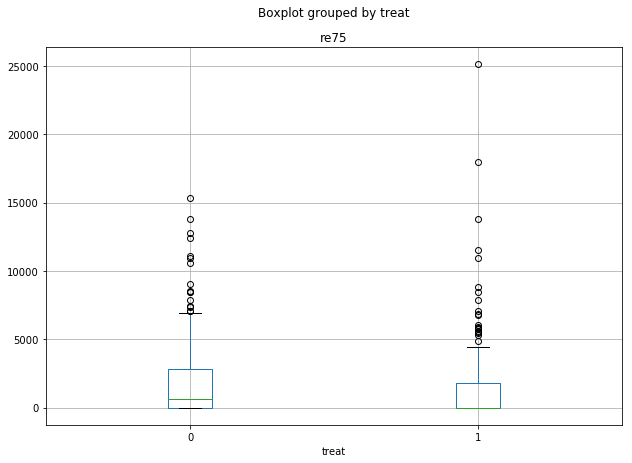

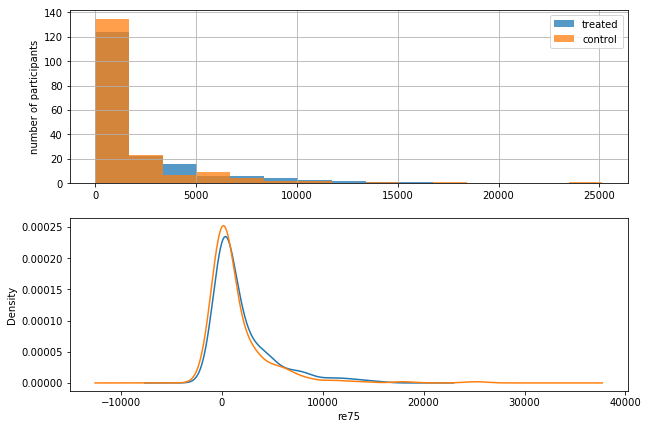

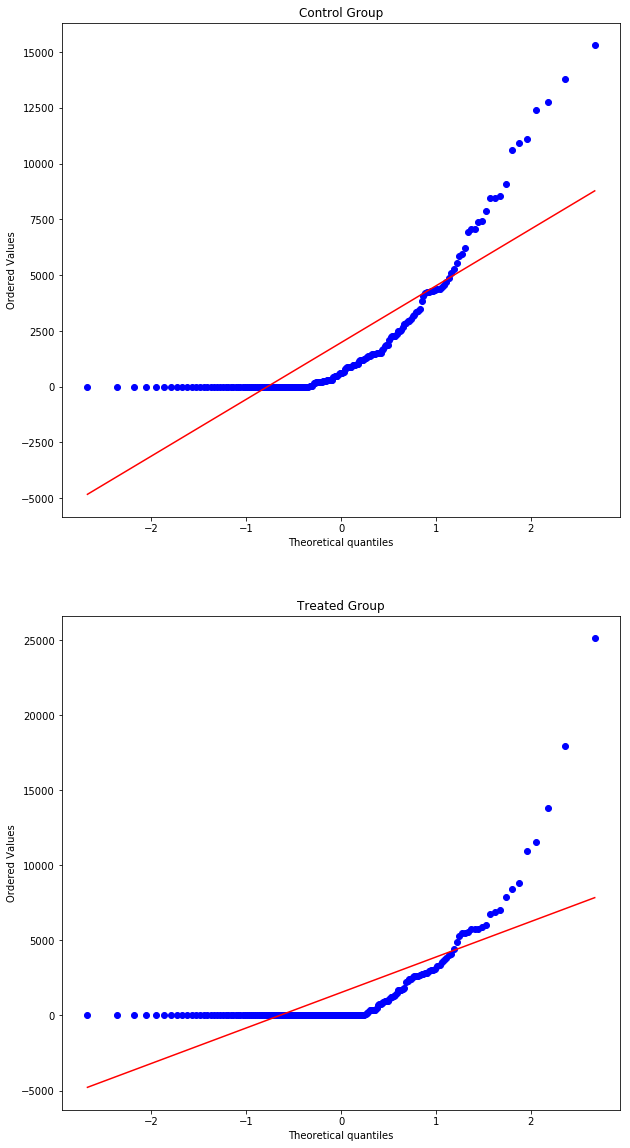


Control group
count      185.000000
mean      1978.470950
std       3007.555635
min          0.000000
25%          0.000000
50%        630.193500
75%       2792.903000
max      15316.210000
Name: re75, dtype: float64
Treated group
count      185.000000
mean      1532.055314
std       3219.250870
min          0.000000
25%          0.000000
50%          0.000000
75%       1817.284000
max      25142.240000
Name: re75, dtype: float64

Ttest_indResult(statistic=1.3782374624515972, pvalue=0.16896734722720977)


                                   re78


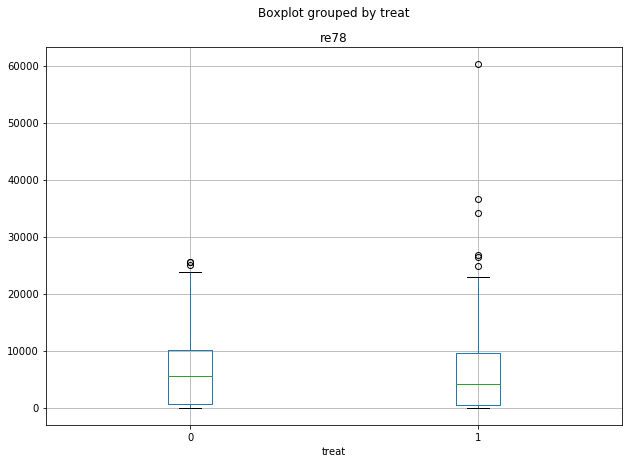

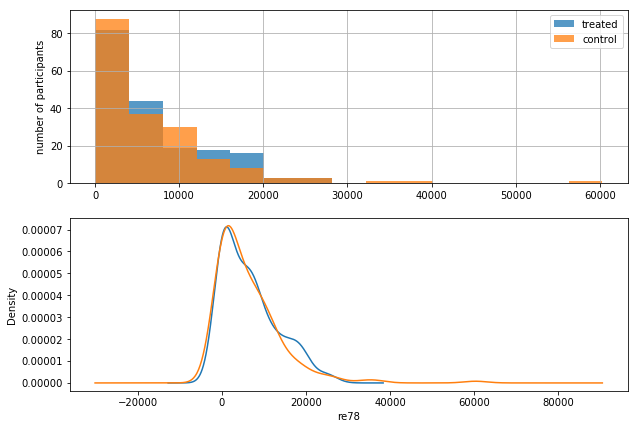

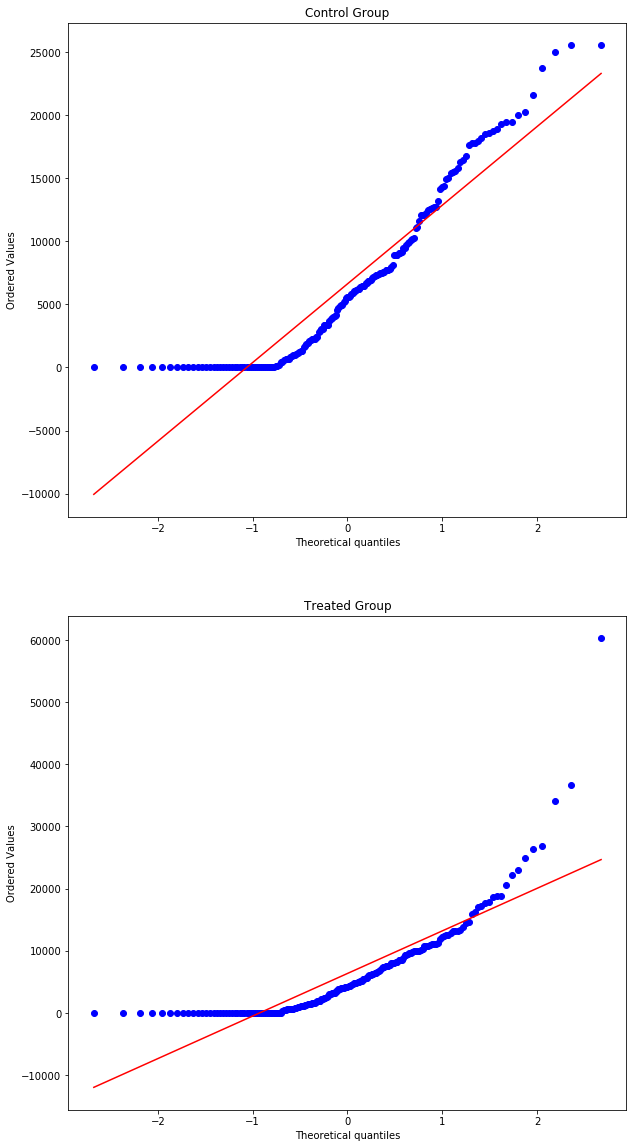


Control group
count      185.000000
mean      6628.058929
std       6566.334204
min          0.000000
25%        582.224300
50%       5551.819000
75%      10122.430000
max      25564.670000
Name: re78, dtype: float64
Treated group
count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64

Ttest_indResult(statistic=0.37020076785621908, pvalue=0.71144587706877638)




In [70]:
for col in ['age', 'educ', 're74', 're75', 're78']:
    analyse_numeric(lalonde_data_balanced, col)

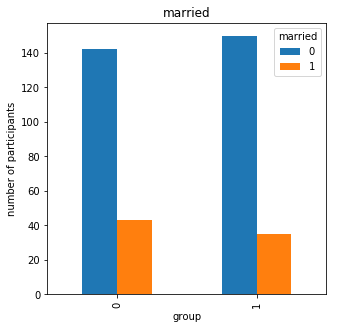

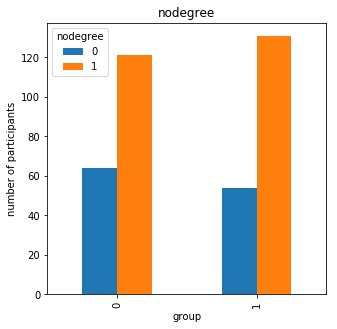

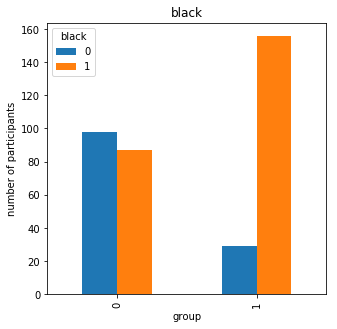

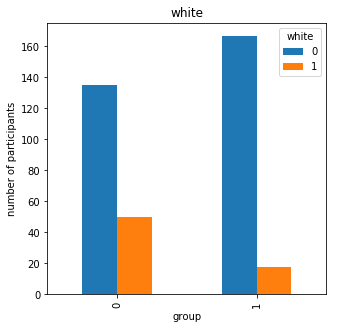

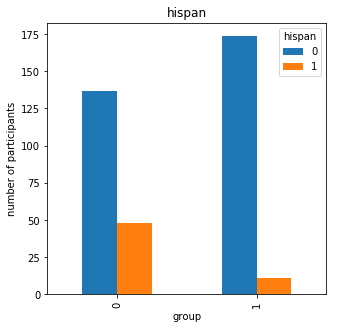

In [71]:
for col in ['married', 'nodegree', 'black', 'white', 'hispan']: # todo only one histogram for race
    draw_bar(lalonde_data_balanced, col)

In [21]:
#todo add test for categoric
#it somehow would make more sense for race ro see ratios...

## 5. Balancing the groups further

identify "the problematic feature": if different in this feature: add very high penalty to weight, oder: direkt in join auf equality filtern :P

problenatic features: age, race

Further balance for race:

In [72]:
graph_data = pd.merge(lalonde_data.reset_index()[lalonde_data.treat == 1], lalonde_data.reset_index()[lalonde_data.treat == 0], on='age')
#print(graph_data.head())
graph_data['weight'] = 1 - np.abs(graph_data['propensity_x'] - graph_data['propensity_y'])
G = nx.Graph()
G.add_weighted_edges_from(zip(graph_data.index_x, graph_data.index_y, graph_data.weight))
matching = nx.max_weight_matching(G)

In [73]:
lalonde_data_balanced = lalonde_data.iloc[list(matching.keys())]
lalonde_data_balanced.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white,propensity
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0,0.542187
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0,0.219299
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0,0.806989
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0,0.708834
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0,0.676078


### Analysis

                                   age


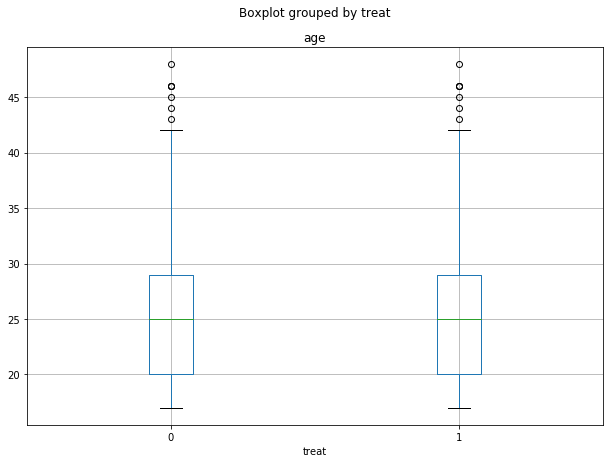

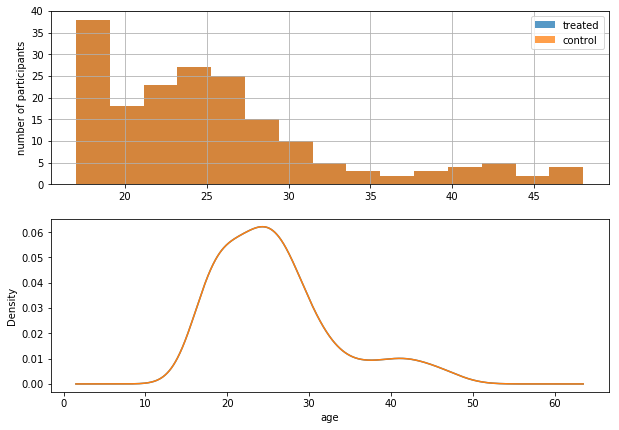

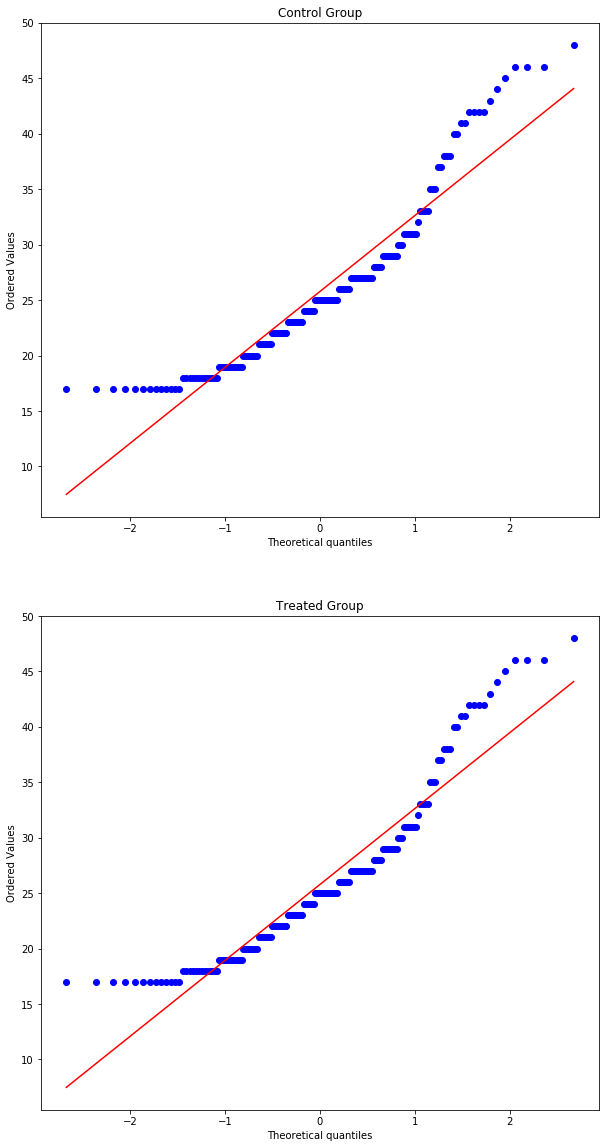


Control group
count    184.000000
mean      25.777174
std        7.154755
min       17.000000
25%       20.000000
50%       25.000000
75%       29.000000
max       48.000000
Name: age, dtype: float64
Treated group
count    184.000000
mean      25.777174
std        7.154755
min       17.000000
25%       20.000000
50%       25.000000
75%       29.000000
max       48.000000
Name: age, dtype: float64

Ttest_indResult(statistic=0.0, pvalue=1.0)


                                   educ


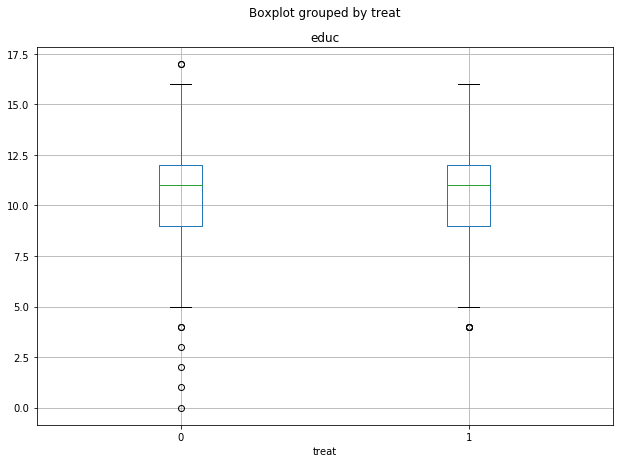

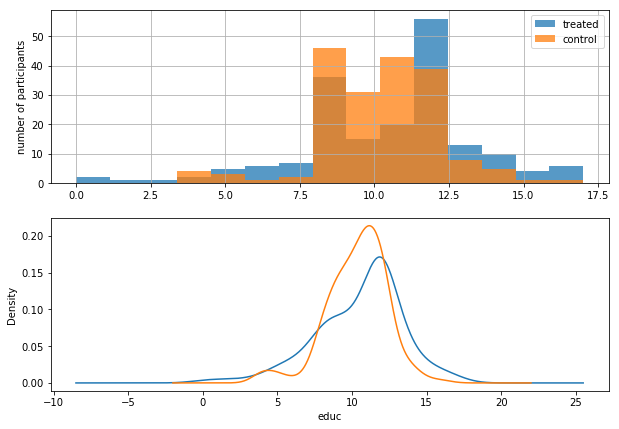

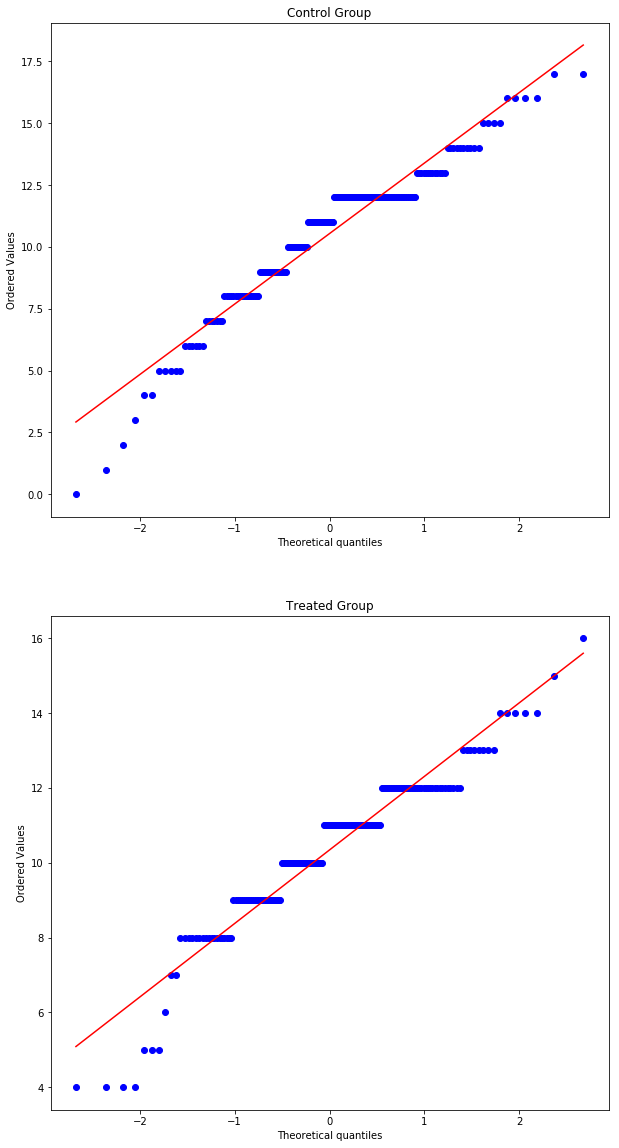


Control group
count    184.000000
mean      10.538043
std        2.910067
min        0.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       17.000000
Name: educ, dtype: float64
Treated group
count    184.000000
mean      10.342391
std        2.015553
min        4.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       16.000000
Name: educ, dtype: float64

Ttest_indResult(statistic=0.74972443757669882, pvalue=0.45390231543250237)


                                   re74


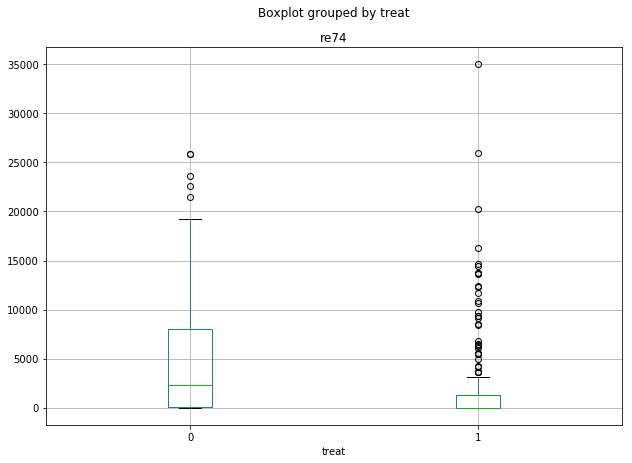

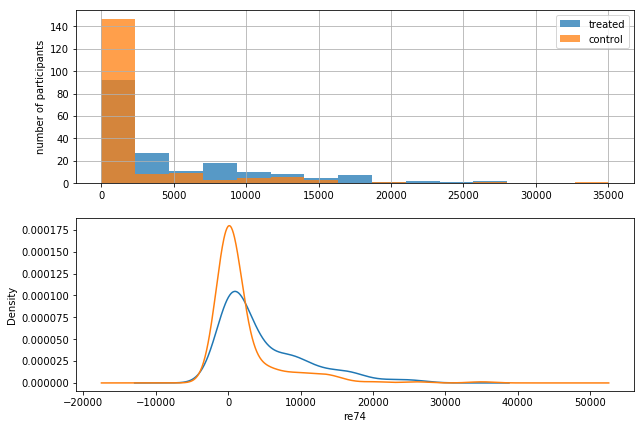

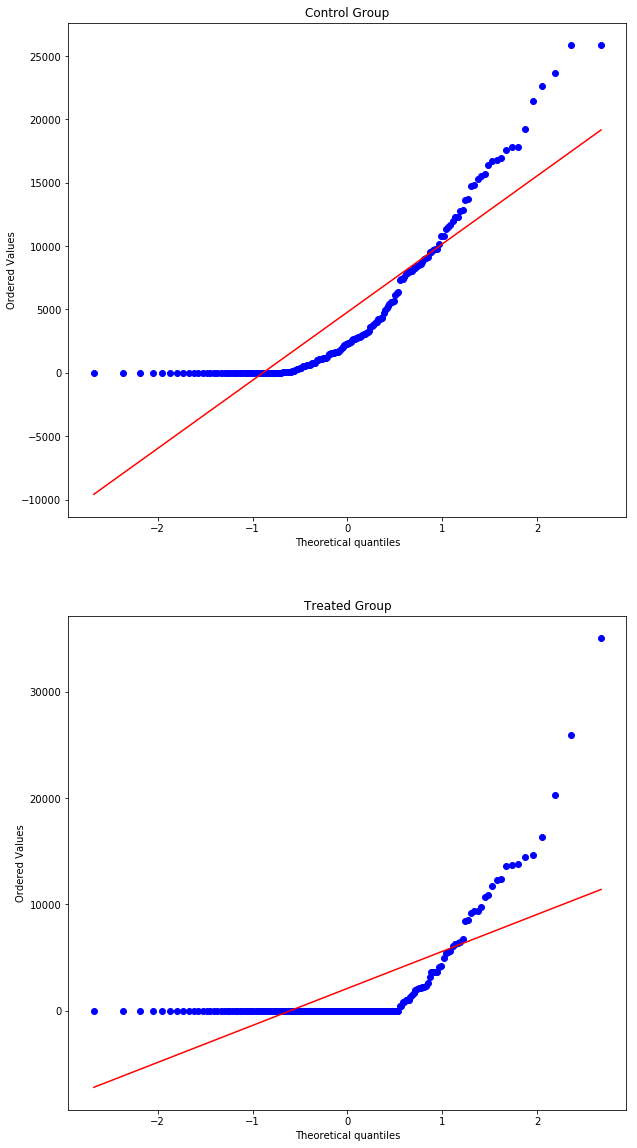


Control group
count      184.000000
mean      4792.100335
std       5964.091349
min          0.000000
25%         43.593685
50%       2306.057000
75%       8018.299250
max      25862.320000
Name: re74, dtype: float64
Treated group
count      184.000000
mean      2106.962676
std       4897.490974
min          0.000000
25%          0.000000
50%          0.000000
75%       1335.688000
max      35040.070000
Name: re74, dtype: float64

Ttest_indResult(statistic=4.7196894447151134, pvalue=3.3680999028950452e-06)


                                   re75


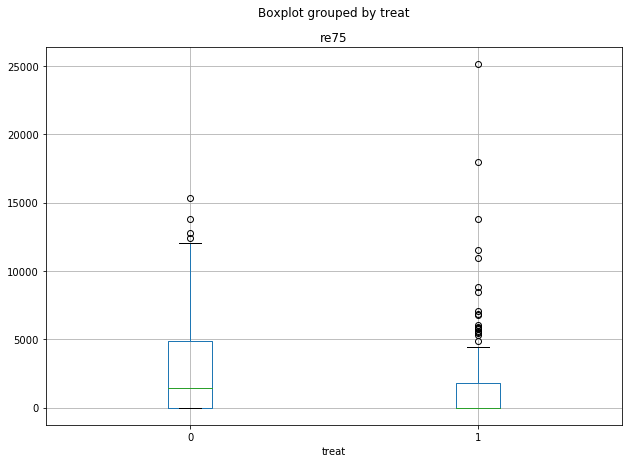

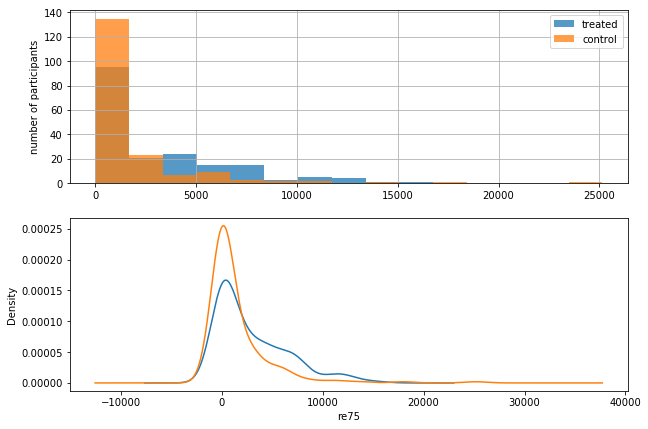

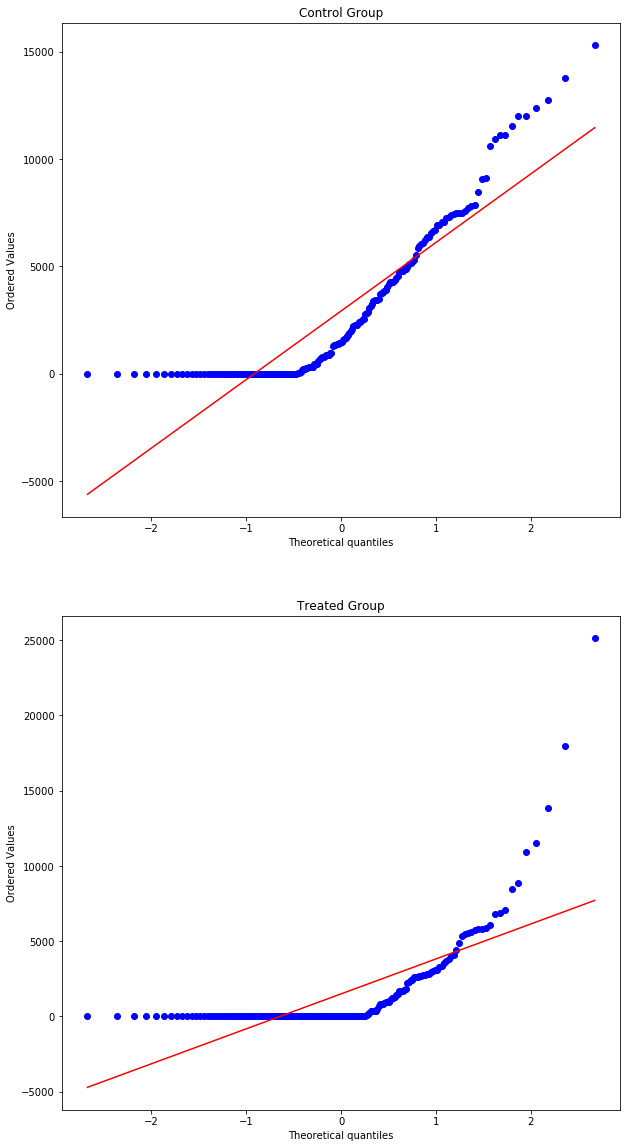


Control group
count      184.000000
mean      2920.502609
std       3496.910150
min          0.000000
25%          0.000000
50%       1463.588500
75%       4868.782500
max      15316.210000
Name: re75, dtype: float64
Treated group
count      184.000000
mean      1497.621288
std       3193.689743
min          0.000000
25%          0.000000
50%          0.000000
75%       1792.526500
max      25142.240000
Name: re75, dtype: float64

Ttest_indResult(statistic=4.0755101501675917, pvalue=5.6341263776738429e-05)


                                   re78


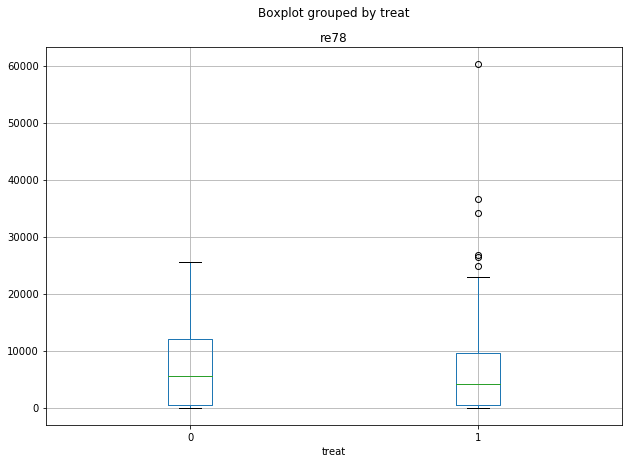

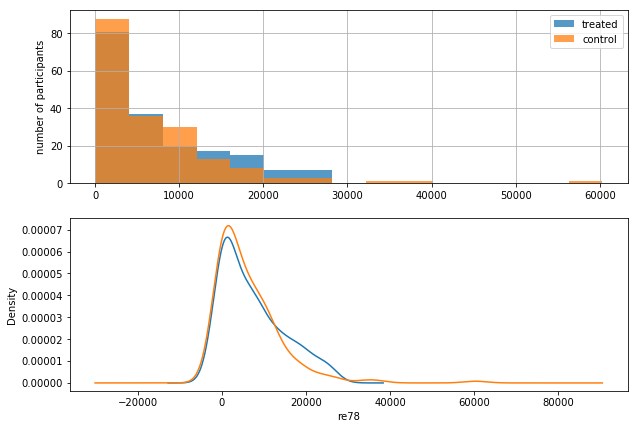

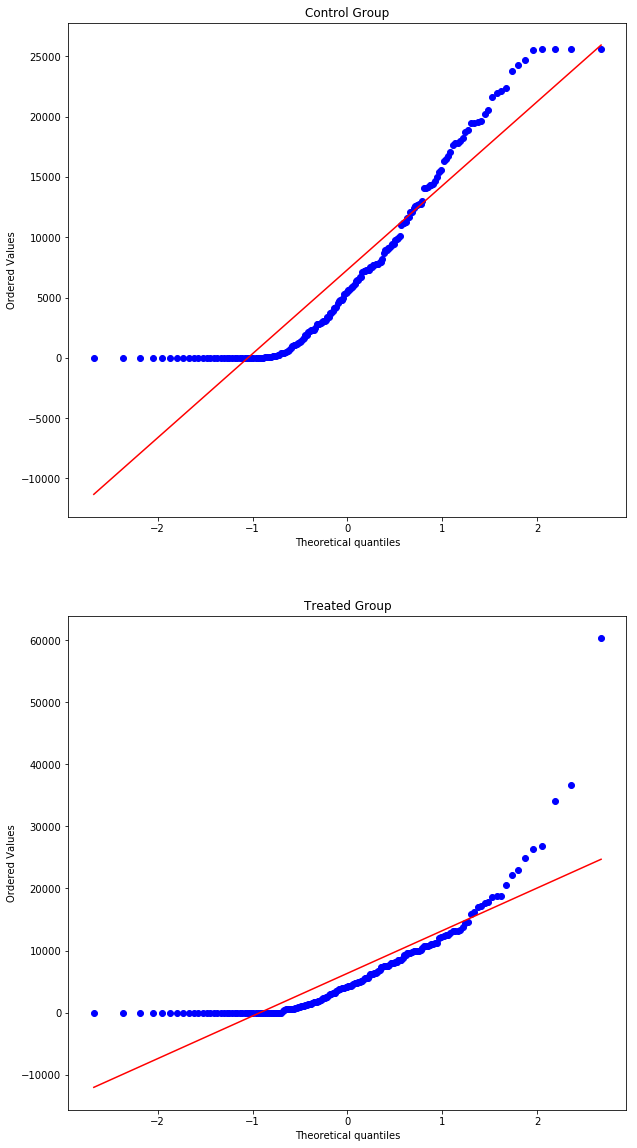


Control group
count      184.000000
mean      7305.076938
std       7361.607402
min          0.000000
25%        411.916275
50%       5571.768000
75%      12070.812500
max      25564.670000
Name: re78, dtype: float64
Treated group
count      184.000000
mean      6349.511522
std       7888.866970
min          0.000000
25%        436.369825
50%       4207.125500
75%       9666.537750
max      60307.930000
Name: re78, dtype: float64

Ttest_indResult(statistic=1.2012726111702818, pvalue=0.23042225257420412)




In [74]:
for col in ['age', 'educ', 're74', 're75', 're78']:
    analyse_numeric(lalonde_data_balanced, col)

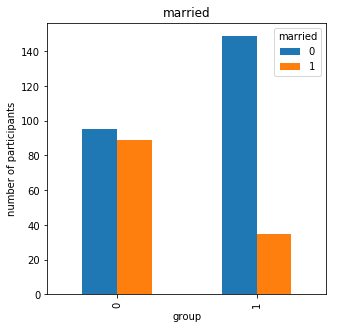

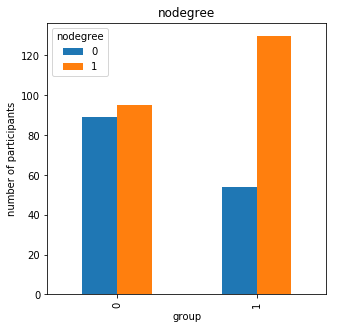

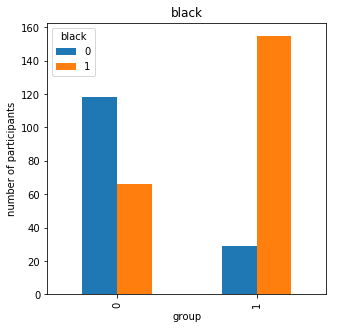

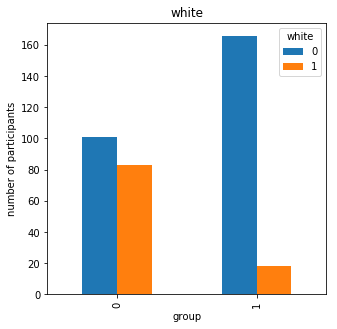

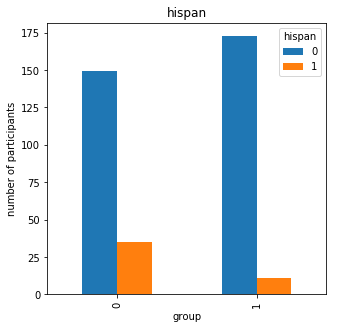

In [75]:
for col in ['married', 'nodegree', 'black', 'white', 'hispan']: # todo only one histogram for race
    draw_bar(lalonde_data_balanced, col)

In [ ]:
#todo add test for categoric

## 6. A less naive analysis

Remark that sensitivity analysis would be good!!

In [ ]:
analyse_numeric(..., 're78')